In [22]:
## Traffic_Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [3]:
data = pd.read_csv('Traffic_Data.csv')
data.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


### 1 .Understanding the traffic density on various days of the week in the urban environments. [ 20 MARKS ] 
- the average traffic density by day of week provides a summary of the typical traffic patterns across a week.

In [14]:
data["Day Of Week"] = pd.Categorical(data["Day Of Week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

traffic_by_day = data.groupby('Day Of Week')['Traffic Density'].mean()

print("Average Traffic Density by Day of Week:")
print(traffic_by_day)

Average Traffic Density by Day of Week:
Day Of Week
Monday       0.273950
Tuesday      0.272943
Wednesday    0.273143
Thursday     0.272366
Friday       0.280504
Saturday     0.283474
Sunday       0.283350
Name: Traffic Density, dtype: float64


C:\Users\Hello\AppData\Local\Temp\ipykernel_8508\460989391.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  traffic_by_day = data.groupby('Day Of Week')['Traffic Density'].mean()


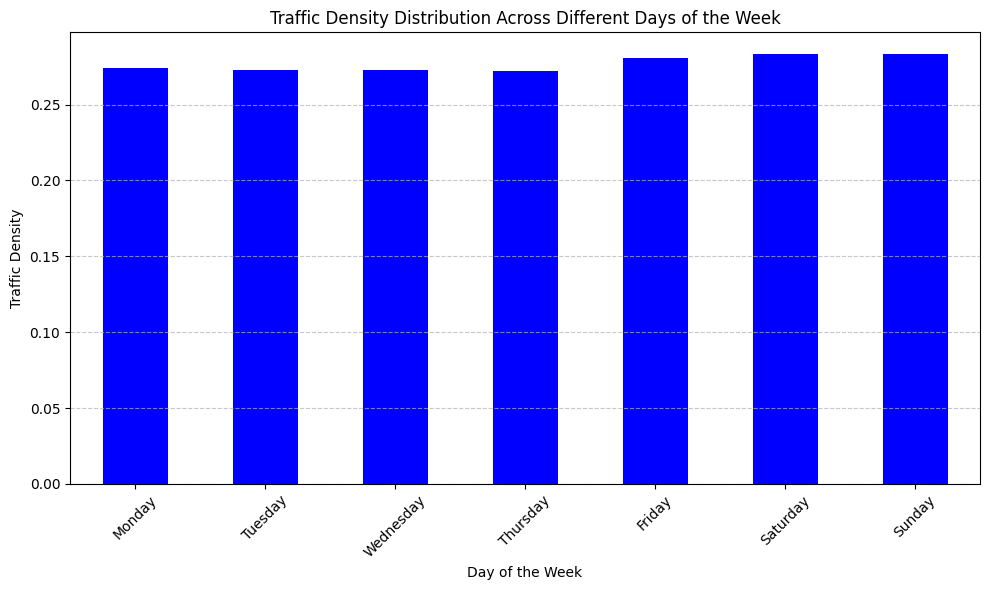

In [15]:
# Ploting the above traffic density distribution across different days of the week
plt.figure(figsize=(10, 6))
traffic_by_day.plot(kind="bar", color="blue")
plt.title("Traffic Density Distribution Across Different Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Traffic Density")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

from the results we can see that ....

### 2.Analyzing the impact of various factors like weather, economic conditions, and vehicle types on traffic density and energy consumption. [ 10 MARKS ]

In [7]:
cont_cols = data.select_dtypes(include=[np.number])

In [ ]:
# Analyzing the impact of weather on traffic density and energy consumption
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Weather", y="Traffic Density", data=data)
plt.title("Impact of Weather on Traffic Density")

plt.subplot(1, 2, 2)
sns.boxplot(x="Weather", y="Energy Consumption", data=data)
plt.title("Impact of Weather on Energy Consumption")
plt.tight_layout()
plt.show()

In [ ]:
# Analyzing the impact of economic conditions on traffic density and energy consumption
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Economic Condition", y="Traffic Density", data=data)
plt.title("Impact of Economic Condition on Traffic Density")

plt.subplot(1, 2, 2)
sns.boxplot(x="Economic Condition", y="Energy Consumption", data=data)
plt.title("Impact of Economic Condition on Energy Consumption")
plt.tight_layout()
plt.show()

In [ ]:
# Analyzing the impact of vehicle types on traffic density and energy consumption
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Vehicle Type", y="Traffic Density", data=data)
plt.title("Impact of Vehicle Type on Traffic Density")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x="Vehicle Type", y="Energy Consumption", data=data)
plt.title("Impact of Vehicle Type on Energy Consumption")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
correlation_matrix = cont_cols.corr()
print(correlation_matrix[['Traffic Density', 'Energy Consumption']]) 

                       Traffic Density  Energy Consumption
Hour Of Day                  -0.014640           -0.002427
Speed                        -0.028211            0.840122
Is Peak Hour                  0.024909           -0.030469
Random Event Occurred         0.000132           -0.000764
Energy Consumption            0.015740            1.000000
Traffic Density               1.000000            0.015740


C:\Users\Hello\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


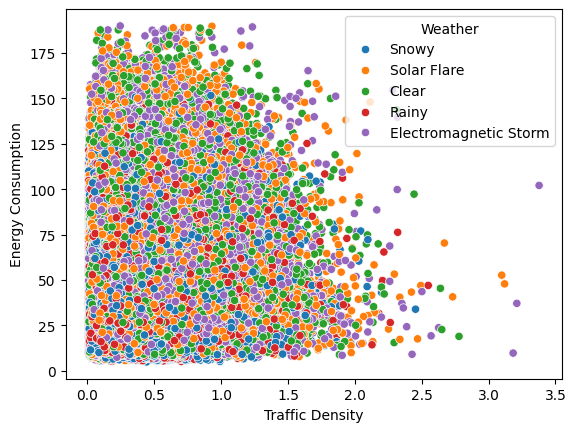

In [10]:
sns.scatterplot(data=data, x='Traffic Density', y='Energy Consumption', hue='Weather')
plt.show()

In [12]:

booming_data = data[data['Economic Condition'] == 'Booming']
recession_data = data[data['Economic Condition'] == 'Recession']


print(f"Average Traffic Density during Booming: {booming_data['Traffic Density'].mean()}")
print(f"Average Traffic Density during Recession: {recession_data['Traffic Density'].mean()}")


Average Traffic Density during Booming: 0.35461461429512836
Average Traffic Density during Recession: 0.12939125982915653


### Developing and testing traffic density prediction algorithms for smart city solutions. [ 10 MARKS ]
- finding the predictor variables that have the most impact on traffic density and energy consumption.

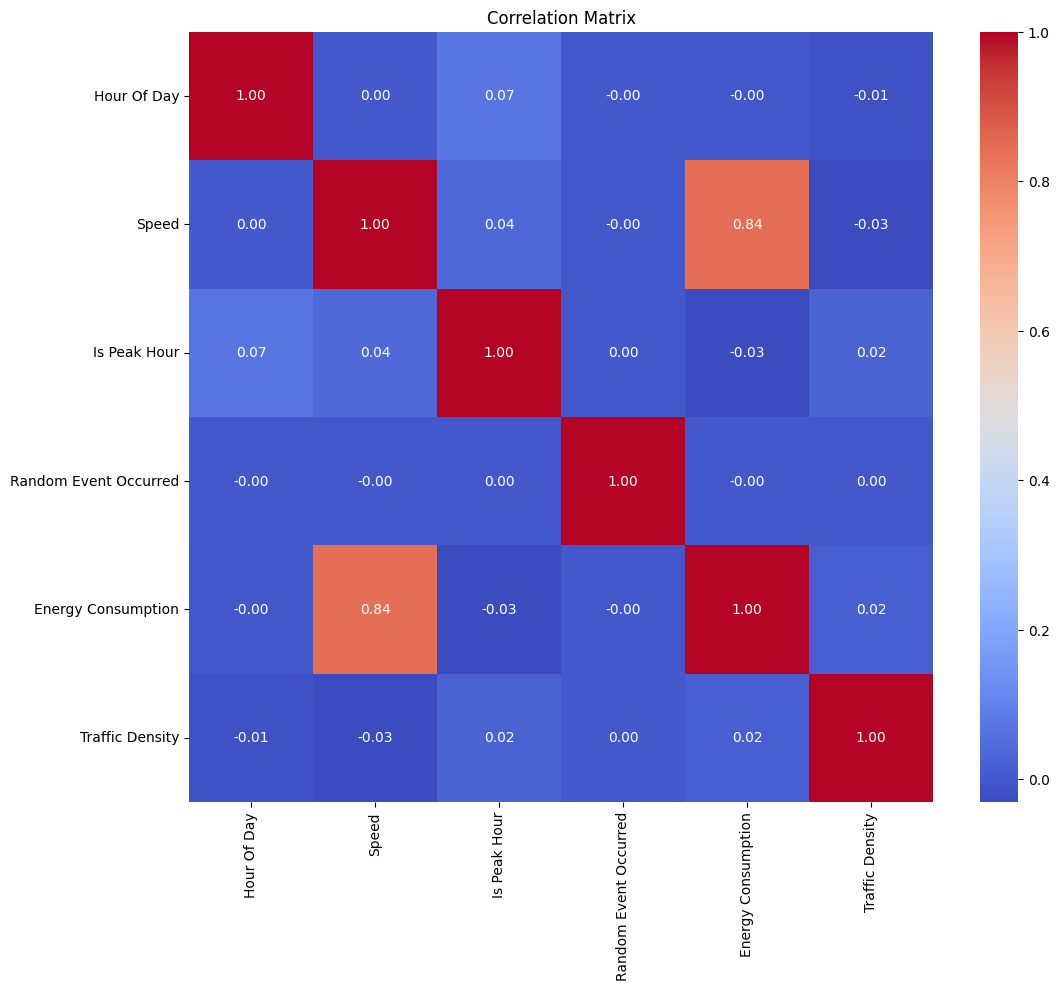

In [16]:
corr_matrix = cont_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
def combined_boxplot(var1, var2):
    sns.boxplot(x=data[var1], y=data[var2])
    plt.xlabel(f"{var1}")
    plt.ylabel(f"{var2}")
    plt.title(f"Boxplots of {var1} vs. {var2}")
    plt.show()

In [23]:
def singleAnova(cont_var, cat_var):
    grouped_data = [
        group[cont_var].values for _, group in data.groupby(cat_var)
    ]
    f_statistic, p_value = f_oneway(*grouped_data)

    if p_value > 0.05:
        print(f"{cat_var} is not correlated with {cont_var}")
    else:
        print(f"{cat_var} is correlated with {cont_var}")

In [17]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition'], dtype='object')

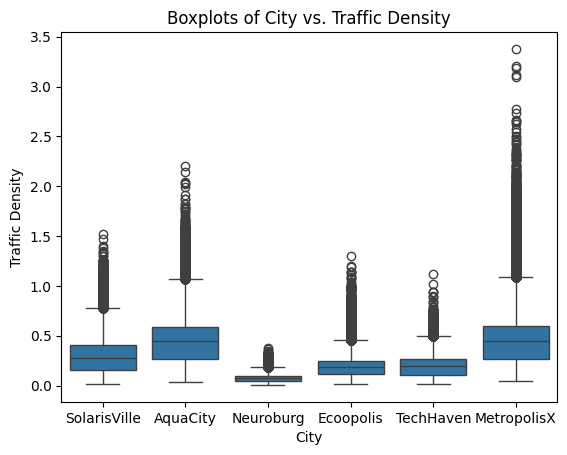

City is correlated with Traffic Density


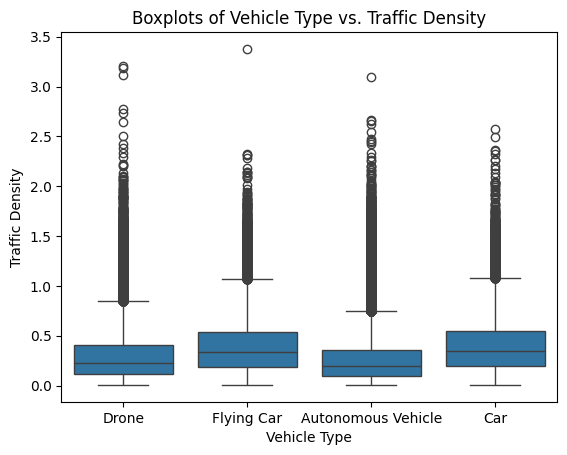

Vehicle Type is correlated with Traffic Density


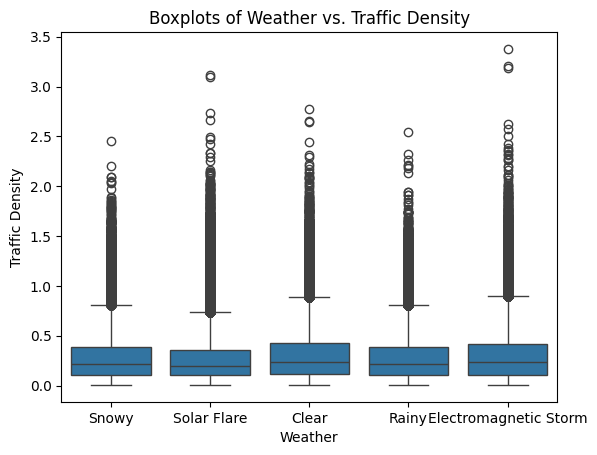

Weather is correlated with Traffic Density


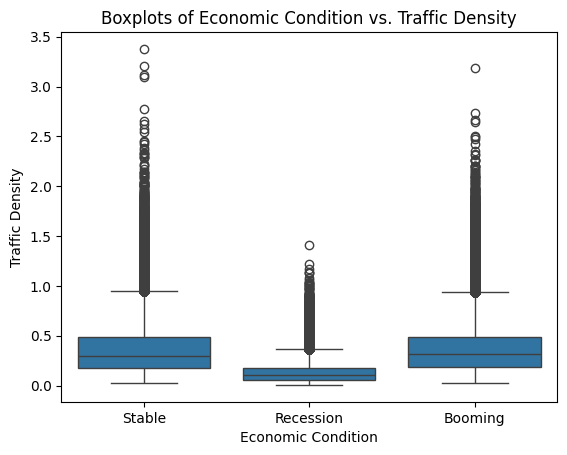

Economic Condition is correlated with Traffic Density


<Figure size 640x480 with 0 Axes>

In [24]:
col1 = 'Traffic Density'
col2 = ['City', 'Vehicle Type', 'Weather', 'Economic Condition']
for i, col in enumerate(col2):
    if not pd.api.types.is_numeric_dtype(data[col]):
        combined_boxplot(col, col1)
        singleAnova(col1, col)
    elif pd.api.types.is_numeric_dtype(data[col2]):
        print(f"One of the parameters must be categorical")
plt.tight_layout()
plt.show()

In [27]:
selecteddataset = data[['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Traffic Density']]

- converting categorical variables to numerical variables using label encoding.

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
selecteddataset.loc[:, 'City'] = le.fit_transform(selecteddataset['City'])
selecteddataset.loc[:, 'Vehicle Type'] = le.fit_transform(selecteddataset['Vehicle Type'])
selecteddataset.loc[:, 'Weather'] = le.fit_transform(selecteddataset['Weather'])
selecteddataset.loc[:, 'Economic Condition'] = le.fit_transform(selecteddataset['Economic Condition'])
selecteddataset.head()

,City,Vehicle Type,Weather,Economic Condition,Traffic Density
0,4,2,3,2,0.5241
1,0,3,4,1,0.3208
2,3,0,4,1,0.0415
3,1,2,0,0,0.1811
4,0,0,4,2,0.4544


## Model Building And Selection

Mean Squared Error: 0.042956664265291
Mean Absolute Error: 0.163337652922051
R-squared: 0.10689116464458481


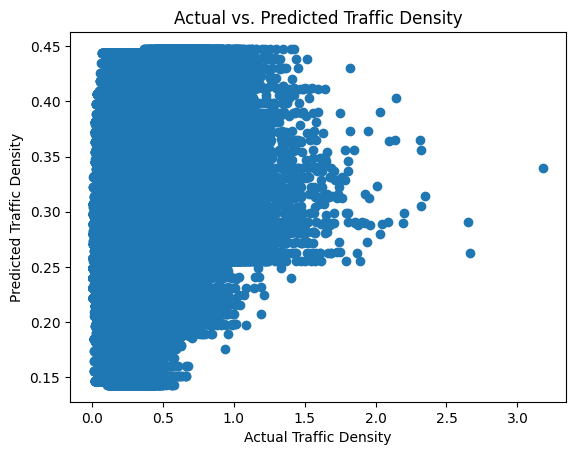

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report
# Select features and target variable
features = ['City', 'Vehicle Type', 'Weather', 'Economic Condition']

target = "Traffic Density"

X_train, X_test, y_train, y_test = train_test_split(selecteddataset[features], selecteddataset[target], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

r2 = model.score(X_test, y_test)
print("R-squared:", r2)

# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Traffic Density")
plt.ylabel("Predicted Traffic Density")
plt.title("Actual vs. Predicted Traffic Density")
plt.show()

Random Forest - Mean Squared Error: 0.012550042013989803
Random Forest - Mean Absolute Error: 0.07211004577134217
Random Forest - R-squared: 0.7390730030256918


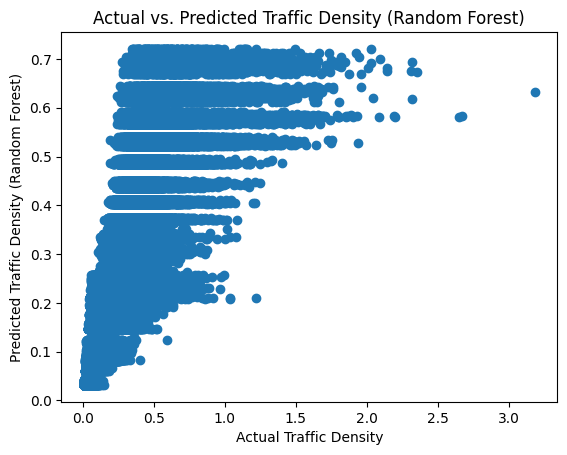

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - Mean Absolute Error:", mae_rf)

r2_rf = rf_model.score(X_test, y_test)
print("Random Forest - R-squared:", r2_rf)
# Plotting actual vs. predicted values for Random Forest model
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Traffic Density")
plt.ylabel("Predicted Traffic Density (Random Forest)")
plt.title("Actual vs. Predicted Traffic Density (Random Forest)")
plt.show()


Gradient Boosting - Mean Squared Error: 0.013220661519542709
Gradient Boosting - Mean Absolute Error: 0.07610824278478828
Gradient Boosting - R-squared: 0.7251302023959203


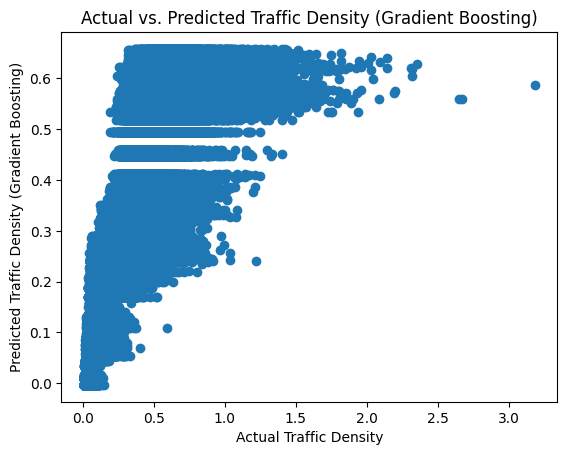

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - Mean Absolute Error:", mae_gb)

r2_gb = gb_model.score(X_test, y_test)
print("Gradient Boosting - R-squared:", r2_gb)
# Plotting actual vs. predicted values for Gradient Boosting model
plt.scatter(y_test, y_pred_gb)
plt.xlabel("Actual Traffic Density")
plt.ylabel("Predicted Traffic Density (Gradient Boosting)")
plt.title("Actual vs. Predicted Traffic Density (Gradient Boosting)")
plt.show()
